In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [7]:
data_path = "data_NO2.csv"
data = pd.read_csv(data_path, header=0, parse_dates=[0], index_col=0, delimiter=';')
train = data.iloc[:-5000] 
test = data.iloc[-5000:]

In [8]:
train.head()

,volume_demand,volume_production,spot_price
datetime_utc,,,
2015-12-31 23:00:00+00:00,4043.0,7818.0,16.39
2016-01-01 00:00:00+00:00,4010.0,7694.0,16.04
2016-01-01 01:00:00+00:00,3930.0,7437.0,15.74
2016-01-01 02:00:00+00:00,3839.0,7120.0,15.57
2016-01-01 03:00:00+00:00,3833.0,7041.0,15.47


In [9]:
# Select `spot_price` as the target variable and the other columns as exogenous variables
train_target = train['spot_price']
train_exog = train[['volume_demand', 'volume_production']]

# Define and fit the ARIMA model with exogenous variables
arima_model = ARIMA(train_target, exog=train_exog, order=(5, 1, 0))
arima_result = arima_model.fit()

# Print summary of the model
print(arima_result.summary())

/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_da

                               SARIMAX Results                                
Dep. Variable:             spot_price   No. Observations:                18666
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -33825.772
Date:                Mon, 28 Oct 2024   AIC                          67667.545
Time:                        13:02:49   BIC                          67730.220
Sample:                             0   HQIC                         67688.119
                              - 18666                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume_demand         0.0035   9.26e-05     37.782      0.000       0.003       0.004
volume_production     0.0006   5.28e-05     10.540      0.000       0.000       0.001
ar.L1                 0.

/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 299.189875988213
Mean Absolute Error: 14.889406775288942


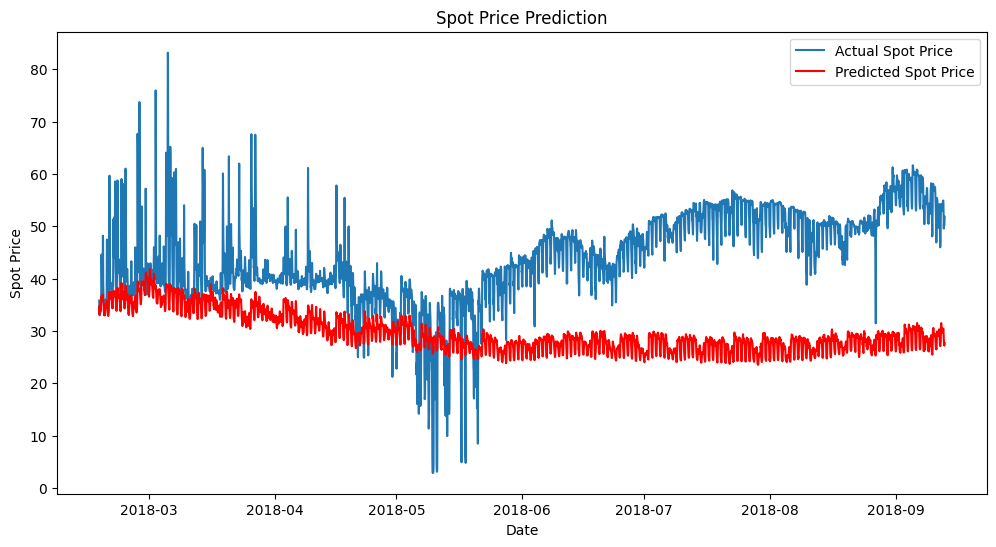

In [11]:
# Prepare test data
test_target = test['spot_price']
test_exog = test[['volume_demand', 'volume_production']]

# Make predictions
predictions = arima_result.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_exog)

# Evaluate model
mse = mean_squared_error(test_target, predictions)
mae = mean_absolute_error(test_target, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(test_target.index, test_target, label='Actual Spot Price')
plt.plot(test_target.index, predictions, label='Predicted Spot Price', color='red')
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.title('Spot Price Prediction')
plt.legend()
plt.show()


In [12]:
# Select `spot_price` as the target variable and other columns as exogenous variables
train_target = train['spot_price']
train_exog = train[['volume_demand', 'volume_production']]

# Define and fit the SARIMAX model with exogenous variables
sarimax_model = SARIMAX(train_target, exog=train_exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

# Print summary of the model
print(sarimax_result.summary())


/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00498D+00    |proj g|=  4.10812D+00

At iterate    5    f=  1.98936D+00    |proj g|=  3.71188D+00

At iterate   10    f=  1.88973D+00    |proj g|=  3.18083D+00

At iterate   15    f=  1.88898D+00    |proj g|=  2.12578D+00

At iterate   20    f=  1.86240D+00    |proj g|=  1.98908D+01

At iterate   25    f=  1.85213D+00    |proj g|=  1.04834D+00

At iterate   30    f=  1.85203D+00    |proj g|=  7.41203D-01

At iterate   35    f=  1.84312D+00    |proj g|=  8.40485D+00

At iterate   40    f=  1.81790D+00    |proj g|=  2.71679D-01

At iterate   45    f=  1.81760D+00    |proj g|=  1.38442D+00

At iterate   50    f=  1.80928D+00    |proj g|=  2.71751D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         spot_price   No. Observations:                18666
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -33771.950
Date:                            Mon, 28 Oct 2024   AIC                          67557.900
Time:                                    13:10:52   BIC                          67612.736
Sample:                                         0   HQIC                         67575.901
                                          - 18666                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
volume_demand         0.0033      0.000     30.650      0.000       0.003       0.003
volume_product

/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/johanbjerkem/Library/CloudStorage/OneDrive-NTNU/Documents/NTNU/5klassehost/ads/TDT4259/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 1040.6276043588814
Mean Absolute Error: 28.120683967880485


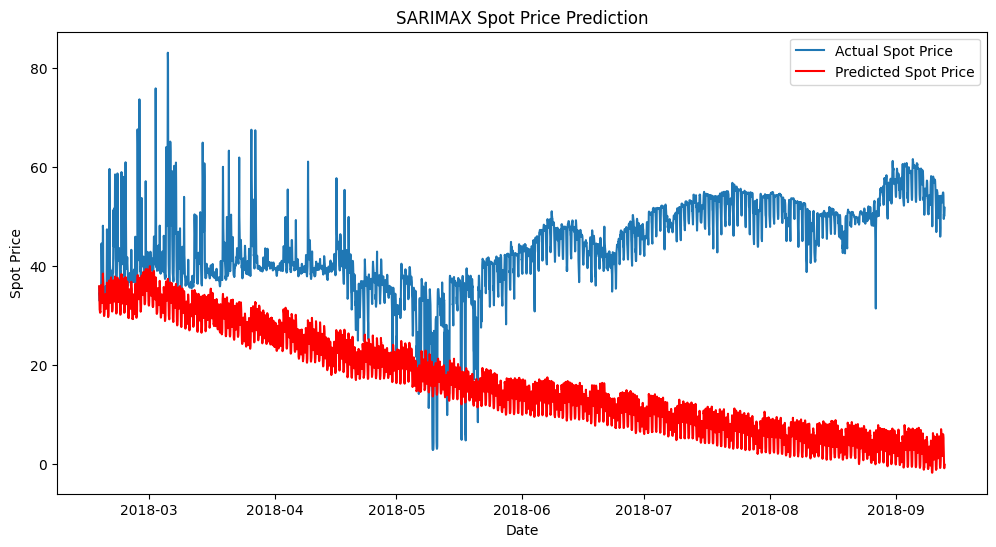

In [13]:
# Prepare test data
test_target = test['spot_price']
test_exog = test[['volume_demand', 'volume_production']]

# Forecast for the test period
sarimax_forecast = sarimax_result.predict(start=len(train_target), end=len(train_target) + len(test_target) - 1, exog=test_exog)

# Evaluate the forecast
mse = mean_squared_error(test_target, sarimax_forecast)
mae = mean_absolute_error(test_target, sarimax_forecast)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plot the forecast vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(test_target.index, test_target, label='Actual Spot Price')
plt.plot(test_target.index, sarimax_forecast, label='Predicted Spot Price', color='red')
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.title('SARIMAX Spot Price Prediction')
plt.legend()
plt.show()
